# Author: Makayla McKibben
## Course: DSC550 Data Mining
## Assignment: Dimensionality Reduction and Feature Selection
## Date: 10.12.2024

In [2]:
# Import relevant libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

### Ex. 7.2-1

In [4]:
# Load data and take a look
housing = pd.read_csv('DSC550 Week 7.csv')
housing.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [5]:
# Check stats on numeric data
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Drop ID column
housing.drop('Id', axis = 1, inplace = True)

In [7]:
# Drop columns missing 40% or more of their data
for column in housing:
    housing.dropna(axis = 1, thresh = (0.6 * len(housing['LotArea'])), inplace = True)
housing.head(18)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [8]:
# Fill missing values with the median for numeric columns and the mode for categorical columns
housing.fillna(housing.median(numeric_only = True), inplace = True)
housing.fillna(housing.mode().iloc[0], inplace = True)
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Take a look
housing.head(18)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [10]:
# Make the df of categorical columns
to_dummy = housing.select_dtypes(include = 'object')
to_dummy

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [11]:
# Make list of categorical columns
colnames = to_dummy.columns.tolist()

In [12]:
# Drop categorical columns
for item in colnames:
    housing.drop(item, inplace = True, axis = 1)

In [13]:
# Get and add the dummies to the df then take a look
dummy = pd.get_dummies(to_dummy)
housing = pd.concat([housing, dummy], axis = 1)
housing.head(18)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,False,False,False,True,False,False,False,False,True,False
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,False,False,False,True,False,False,False,False,True,False
7,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,False,False,False,True,False,False,False,False,True,False
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,False,False,False,True,True,False,False,False,False,False
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,False,False,False,True,False,False,False,False,True,False


In [14]:
# Set features and target variables
target = housing['SalePrice']
housing.drop('SalePrice', axis = 1, inplace = True)
features = housing

In [15]:
# Split into train and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 18)

In [16]:
# Create linear regression object
regressor = LinearRegression()

In [17]:
# Fit the regression model
regressor.fit(features_train, target_train)

LinearRegression()

In [18]:
# Make predictions using our linear model
lin_pred_test = regressor.predict(features_test)

In [19]:
# Find R^2 value for goodness of fit and percentage that accounts for variation
r2_lin = r2_score(target_test, lin_pred_test)

In [20]:
# Find RMSE for information about the residuals
rmse_lin = root_mean_squared_error(target_test, lin_pred_test)

In [21]:
# Create pca object
pca = PCA(n_components = 0.9, whiten = True)

In [22]:
# Create linear regression object
regress2 = LinearRegression()

In [23]:
# Scale features for pca
std_scaler_train = StandardScaler().fit_transform(features_train)

In [24]:
# Fit pca model to scaled training data
features_train_pca = pca.fit_transform(std_scaler_train)

In [25]:
# Print the original and reduced feature counts
print('Original number of features: ', features_train.shape[1])
print('Reduced number of features: ', features_train_pca.shape[1])

Original number of features:  266
Reduced number of features:  138


In [26]:
# Fit linear regression to pca training data
regress2.fit(features_train_pca, target_train)

LinearRegression()

In [27]:
# Scale test features
features_test_std = StandardScaler().fit_transform(features_test)

In [28]:
# Just transform the test data do not fit with pca
features_test_pca = pca.transform(features_test_std)

In [29]:
# Make predictions using our pca model
lin_pred_test_pca = regress2.predict(features_test_pca)

In [30]:
# Find R^2 value for goodness of fit and percentage that accounts for variation
r2_lin_pca = r2_score(target_test, lin_pred_test_pca)

In [31]:
# Find RMSE for information about the residuals
rmse_lin_pca = root_mean_squared_error(target_test, lin_pred_test_pca)

In [32]:
# Create min max scaler object
minmax_scaler = preprocessing.MinMaxScaler()

In [33]:
# Apply min max scaler to training features
minmax_train = minmax_scaler.fit_transform(features_train)

In [34]:
# Set variance threshold and create object
threshold = VarianceThreshold(threshold = 0.1)

In [35]:
# Fit the training data using the threshold
features_train_var10 = threshold.fit_transform(minmax_train)
features_train_var10

array([[0.98333333, 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.13333333, 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.43333333, 0.25      , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.95      , 0.75      , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.7       , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ]])

In [36]:
# Find the shape of the new df
features_train_var10.shape

(1168, 49)

In [37]:
# Scale test data
minmax_test = minmax_scaler.fit_transform(features_test)

In [38]:
# Transform test data using the threshold
features_test_var10 = threshold.transform(minmax_test)
features_test_var10

array([[0.94915254, 0.75      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49152542, 0.25      , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.84745763, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.20338983, 0.75      , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.86440678, 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.44067797, 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [39]:
# Find shape of new test data
features_test_var10.shape

(292, 49)

In [40]:
# Create linear regression object
regress3 = LinearRegression()

In [41]:
# Fit regression model to high variance training set
regress3.fit(features_train_var10, target_train)

LinearRegression()

In [42]:
# Predict test values using the high variance scaled test data
lin_high_var_test_pred = regress3.predict(features_test_var10)

In [43]:
# Find R^2 value for goodness of fit and percentage that accounts for variation
r2_high_var = r2_score(target_test, lin_high_var_test_pred)

In [44]:
# Find RMSE for information about the residuals
rmse_high_var = root_mean_squared_error(target_test, lin_high_var_test_pred)

In [45]:
# Print summary statistics
print('The R^2 value for no feature transformation linear regression is: ', round(r2_lin,  3))
print('The R^2 value for pca linear regression is: ', round(r2_lin_pca, 3))
print('The R^2 value for high variance features only in the linear regression is: ', round(r2_high_var, 3))

The R^2 value for no feature transformation linear regression is:  0.903
The R^2 value for pca linear regression is:  0.883
The R^2 value for high variance features only in the linear regression is:  0.673


In [46]:
# Print summary statistics
print('The RMSE value for no feature transformation linear regression is: ', round(rmse_lin, 2))
print('The RMSE value for pca linear regression is: ', round(rmse_lin_pca, 2))
print('The RMSE value for high variance features in the linear regression is: ', round(rmse_high_var, 2))

The RMSE value for no feature transformation linear regression is:  25090.1
The RMSE value for pca linear regression is:  27567.88
The RMSE value for high variance features in the linear regression is:  46133.14


There is similar performance between the raw linear regression and the pca linear regression with a slight decline for the pca transformed data. The high variance predicted values gave a notable drop in performance in both R^2 and RMSE.

### Ex. 7.2-2

In [49]:
# Load and look at mushroom data
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head(18)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [50]:
# Look at stats of mushroom data
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [51]:
# Get dummies of mushroom data and place in new df
mush_dummies = pd.get_dummies(mushrooms)
mush_dummies

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [52]:
# Set target and drop target classes
target = mush_dummies['class_p']
mush_dummies.drop('class_e', inplace = True, axis = 1)
mush_dummies.drop('class_p', inplace = True, axis = 1)
mush_dummies

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [53]:
# Set features
features = mush_dummies

In [54]:
# Train test split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 18)

In [55]:
# Create decision tree
decision_tree = DecisionTreeClassifier(random_state = 18)

In [56]:
# Fit decision tree model to mushroom data
tree_model = decision_tree.fit(features_train, target_train)

In [57]:
# Predict test results using our model
tree_pred_test = tree_model.predict(features_test)

In [58]:
# Prep to find accuracy of model
tree_pred_test = tree_pred_test * 1
target_test = target_test * 1
tree_pred_acc = tree_pred_test + target_test
tree_pred_acc

2614    0
5290    2
2847    0
2630    0
300     0
       ..
4093    0
2060    0
6329    2
6653    2
2416    0
Name: class_p, Length: 1625, dtype: int32

In [59]:
# Find accuracy of model
num_zero = tree_pred_acc[(tree_pred_acc == 0)].count()
num_two = tree_pred_acc[(tree_pred_acc == 2)].count()
acc = print('Accuracy is: ', round(((num_zero + num_two) / len(tree_pred_acc)) * 100, 2), '%')

Accuracy is:  100.0 %


In [60]:
# Create confusion matrix
tree_test_confusion = confusion_matrix(target_test, tree_pred_test)

In [61]:
# Create df from confusion matrix
tree_test_df = pd.DataFrame(tree_test_confusion)

<function matplotlib.pyplot.show(close=None, block=None)>

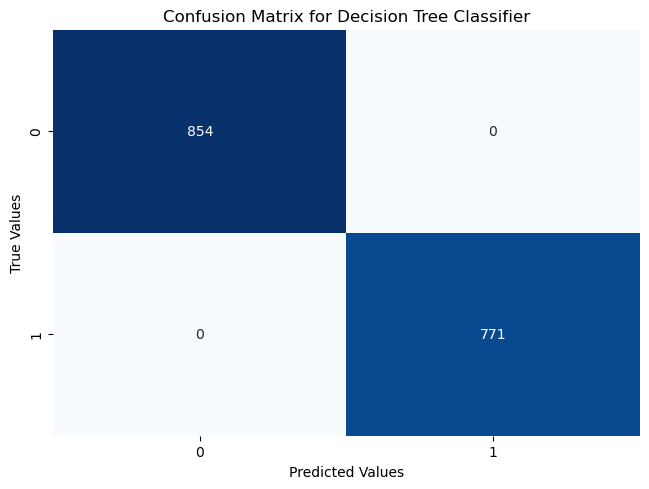

In [62]:
# Plot confusion matrix
sns.heatmap(tree_test_df, annot = True, cbar = None, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree Classifier') 
plt.tight_layout()
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show

[Text(0.5882352941176471, 0.9285714285714286, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3354, 3145]'),
 Text(0.35294117647058826, 0.7857142857142857, 'x[53] <= 0.5\ngini = 0.285\nsamples = 3676\nvalue = [633, 3043]'),
 Text(0.23529411764705882, 0.6428571428571429, 'x[55] <= 0.5\ngini = 0.136\nsamples = 3249\nvalue = [239.0, 3010.0]'),
 Text(0.17647058823529413, 0.5, 'x[22] <= 0.5\ngini = 0.05\nsamples = 3090\nvalue = [80, 3010]'),
 Text(0.11764705882352941, 0.35714285714285715, 'x[25] <= 0.5\ngini = 0.024\nsamples = 3047\nvalue = [37, 3010]'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 3010\nvalue = [0, 3010]'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.29411764705882354, 0.5, 'gini = 0.0\nsamples = 159\nvalue = [159, 0]'),
 Text(0.47058823529411764, 0.6428571428571429, 'x[87] <= 0.5\ngini = 0.

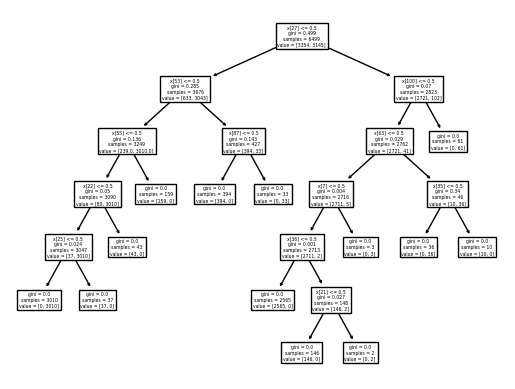

In [63]:
# Plot decision tree
tree.plot_tree(tree_model)

In [64]:
# Set rest of values to integers instead of boolean
features_train = features_train.astype(int)
features_test = features_test.astype(int)
target_train = target_train.astype(int)

In [65]:
# Find five best features
chi2_select = SelectKBest(chi2, k = 5)
five_best = chi2_select.fit_transform(features_train, target_train)

In [66]:
# Print number of original and reduced features
print('Original number of features: ', features_train.shape[1])
print('Reduced number of features: ', five_best.shape[1])

Original number of features:  117
Reduced number of features:  5


In [67]:
# Make list of columns indices
col_ids = chi2_select.get_support(indices = True)
col_ids

array([24, 27, 37, 57, 61], dtype=int64)

In [68]:
# Make list of column names from indices list
colnames = []
for item in col_ids:
    colnames.append(features_train.iloc[0, [item]].keys())
colnames    

[Index(['odor_f'], dtype='object'),
 Index(['odor_n'], dtype='object'),
 Index(['gill-color_b'], dtype='object'),
 Index(['stalk-surface-above-ring_k'], dtype='object'),
 Index(['stalk-surface-below-ring_k'], dtype='object')]

In [69]:
# Subset df
features_train = features_train[['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']]
features_train

,odor_f,odor_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-below-ring_k
4718,1,0,0,1,1
1696,0,1,0,0,0
2252,0,1,0,0,0
1049,0,1,0,0,0
3235,1,0,0,1,1
...,...,...,...,...,...
1726,0,1,0,0,0
2885,0,1,0,0,0
1144,0,1,0,0,0
4371,1,0,0,1,1


In [70]:
# Subset test df
features_test = features_test[['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']]
features_test

,odor_f,odor_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-below-ring_k
2614,0,1,0,0,0
5290,1,0,0,0,0
2847,0,1,0,0,0
2630,0,1,0,0,0
300,0,1,0,0,0
...,...,...,...,...,...
4093,0,1,0,0,0
2060,0,1,0,0,0
6329,1,0,1,0,1
6653,1,0,1,1,0


In [71]:
# Fit decision tree model using top five features
tree_model = decision_tree.fit(features_train, target_train)

In [72]:
# Predict using our model and test data
tree_pred_test = tree_model.predict(features_test)

In [73]:
# Prep to find accuracy
tree_pred_test = tree_pred_test * 1
tree_pred_acc = tree_pred_test + target_test
tree_pred_acc

2614    0
5290    2
2847    0
2630    0
300     0
       ..
4093    0
2060    0
6329    2
6653    2
2416    0
Name: class_p, Length: 1625, dtype: int32

In [74]:
# Find accuracy of model
num_zero = tree_pred_acc[(tree_pred_acc == 0)].count()
num_two = tree_pred_acc[(tree_pred_acc == 2)].count()
acc = print('Accuracy is: ', round(((num_zero + num_two) / len(tree_pred_acc)) * 100, 2), '%')

Accuracy is:  92.62 %


In [75]:
# Create confusion matrix
tree_test_confusion = confusion_matrix(target_test, tree_pred_test)

In [76]:
# Create df from confusion matrix
tree_test_df = pd.DataFrame(tree_test_confusion)

<function matplotlib.pyplot.show(close=None, block=None)>

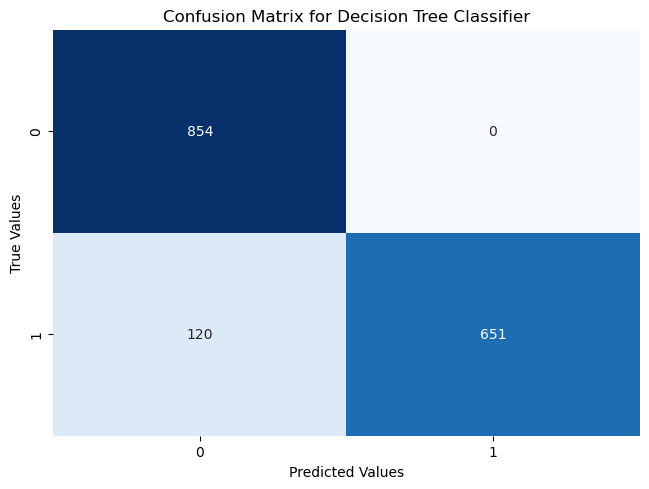

In [77]:
# Plot confusion matrix
sns.heatmap(tree_test_df, annot = True, cbar = None, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree Classifier') 
plt.tight_layout()
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show

When selecting the five best features from the df to build our model from, we drop our accuracy from 100% to 92.62%. The five best features model predicted 120 mushrooms out of 6499 to be non-poisonous when they actually were. This error could potentially get someone killed and we should look to keep accuracy at 100% at the cost of a simplified model.